<h1><center><img src='https://cdn-images-1.medium.com/max/2600/1*aqNgmfyBIStLrf9k7d9cng.jpeg'/></center></h1>


What is PyTorch?

PyTorch is a Python based computing library, targeted to two main goals:
1. Replace Numpy to use the power of GPU
2. Deeplaerning research platform which provides flexibility and speed

In [1]:
import numpy as np

import torch
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F

from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Current device is ', device)

Current device is  cpu


<h2>Tensor</h2>

Tensor is similar to Numpy ndarray, but provides copabilities of being calculated on GPU

How can we create tensors in PyTorch?

In [2]:
# Generating a new tensor of shape (5, 7)
# Note: the values of each tensor element is trash
torch.empty(5, 7)

tensor([[-1.5418e+15,  4.5775e-41, -1.5418e+15,  4.5775e-41,  3.7415e-43,
          0.0000e+00,  6.4890e-07],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  4.5918e-40,
          2.6306e-22,  1.4013e-45],
        [        nan,         nan,  0.0000e+00,  0.0000e+00,  2.6306e-22,
          1.4013e-45, -1.5418e+15],
        [ 4.5775e-41, -1.5418e+15,  4.5775e-41,  3.7695e-43,  0.0000e+00,
          2.6278e-22,  1.4013e-45],
        [-1.4214e+15,  4.5775e-41, -1.4214e+15,  4.5775e-41,  1.8021e-42,
          0.0000e+00,  1.8063e-42]])

In [2]:
torch.rand(3, 5)

tensor([[0.7767, 0.7629, 0.5792, 0.2430, 0.7086],
        [0.0686, 0.1220, 0.1715, 0.5873, 0.6557],
        [0.0746, 0.8218, 0.8368, 0.5573, 0.0762]])

In [4]:
torch.zeros(3,3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [3]:
# We can also use Numpy slicing to get the date from our tensors

a = torch.randint(0, 25, (5,5))

print(a)

b = a[1::2, 1::2]

print('Sliced ', b)

tensor([[14,  4,  7, 15,  3],
        [ 0,  1,  0, 22,  1],
        [ 0,  1,  8, 16, 24],
        [ 8, 19,  7, 18, 18],
        [ 7, 12,  2, 12, 20]])
Sliced  tensor([[ 1, 22],
        [19, 18]])


<b>Basic tensor operations</b>

For exhaustive list look here: https://pytorch.org/docs/stable/torch.html

In [9]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])

print("Summation ", torch.add(a, b)) # the same as a + b

print("Multiplication ", torch.mul(a, b)) # the same as a * b

print("Dividing ", b / a)

print("Expanation ", a ** b)

Summation  tensor([5, 7, 9])
Multiplication  tensor([ 4, 10, 18])
Dividing  tensor([4, 2, 2])
Expanation  tensor([  1,  32, 729])


Creating tensors on GPU

In [10]:
torch.ones((5,5), device = device)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

<h3>Autograd: Automatic differentiation</h3>

The main package for all of the NN in py torch is <b>autograde</b> package. This package provides automatic differentiation for all operations on Tensors. 

<b>torch.Tensor</b> is the main class of this package. If we want to start tracking all the operations on it we can simply set <b>requires_grad</b> prop as True and autograd start tracking all the operation on this tensor.

If we want to stop tracking operations we can call <b>.detach</b> method of tensor and autograde stop tracking all the operations.

We can also prevent autograd from tracking the history by wraping the code int <b> with torch.no_grad(): </b> block.

In order to calculate the derivatives we can call <b>.backward()</b> method on a Tensor

Let's take a look on an example:

In [46]:
a = torch.zeros((3,3), requires_grad=True)
a

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], requires_grad=True)

In [47]:
b = a + 10
b

tensor([[10., 10., 10.],
        [10., 10., 10.],
        [10., 10., 10.]], grad_fn=<AddBackward0>)

In [48]:
z = b ** 3
z

tensor([[1000., 1000., 1000.],
        [1000., 1000., 1000.],
        [1000., 1000., 1000.]], grad_fn=<PowBackward0>)

In [49]:
d = torch.sum(z)

In [50]:
d.backward()

In [51]:
a.grad

tensor([[300., 300., 300.],
        [300., 300., 300.],
        [300., 300., 300.]])

\begin{align}
d = \sum z_i, z_i =  (a + 10) ^ 3, z_i = 1000 \\
Therefore, \frac{\partial d}{\partial x} = 3 * (x_i + 10)^2 = 3 * (0 + 10)^2 = 300
\end{align}


Now when we understand how to create tensors in PyTorch and how the autgrad works we can try to build our first Neural Network.

In [52]:
batch_size, input_dimension, hidden_dimension, output_dimension = 64, 16, 64, 10
lr = 1e-4
epochs = 100

In [53]:
x = torch.randn(batch_size, input_dimension, device=device)
y = torch.randn(batch_size, output_dimension, device=device)

print("x size: ", x.size())
print("y size: ", y.size())

x size:  torch.Size([64, 16])
y size:  torch.Size([64, 10])


In [54]:
model = nn.Sequential(
            nn.Linear(input_dimension, hidden_dimension),
            nn.ReLU(),
            nn.Linear(hidden_dimension, output_dimension)            
        ).to(device)

In [55]:
loss_fn = nn.MSELoss(reduction='sum')

In [57]:
model.train()

for i in range(epochs):
    yhat = model(x)
    
    loss = loss_fn(yhat, y)
    if i % 10 == 0:
        print(i, loss.item())

    # Zero the gradients before running the backwprop.
    model.zero_grad()

    # Computer all the gradients of the loss in the respect to all learnable params
    loss.backward()

    # Update the weights using Gradient Decent
    with torch.no_grad():
        for param in model.parameters():
            param.data -= lr * param.grad

0 448.038330078125
10 437.834228515625
20 428.019775390625
30 418.6061096191406
40 409.5091552734375
50 400.7294616699219
60 392.2059326171875
70 383.9371643066406
80 375.8520202636719
90 367.9934997558594


Before we used Gradient Decent in order to update the weights of our model. This looks a little bit cranky and it wouldn't be really a good idea to write something like this all the time. Fortunatelly, PyTorch comes with a lot of useful classes which will helps us to use different strategies to update our weights.

<b>torch.optim</b> packages comes with a lot of useful predefined classes and functions. For example:
1. torch.optim.Adam
2. torch.optim.SGD
3. torch.optim.Adadelta
4. torch.optim.Adagrad  

For full list of optimizers take a look https://pytorch.org/docs/stable/optim.html

So, now we can use torch.optim.* package to update our weights

In [58]:
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [59]:
for i in range(epochs):
    yhat = model(x)
    
    loss = loss_fn(yhat, y)

    # Zero the gradients before running the backwprop.
    optimizer.zero_grad()

    # Computer all the gradients of the loss in the respect to all learnable params
    loss.backward()

    # Update the weights using Gradient Decent
    optimizer.step()
    
    if i % 10 == 0:
        print(i, loss.item())


0 360.3710632324219
10 357.6697998046875
20 355.0159912109375
30 352.392822265625
40 349.7917175292969
50 347.2153015136719
60 344.6536865234375
70 342.1019592285156
80 339.5645446777344
90 337.0379333496094


### Exercise 1:

1. Generate random dataset which has batch_size = 128 and 15 input features
2. Generate random result labels with size 128 and 5
3. Create a simple NN with next architecture Linear -> Relu -> Linear -> Relu -> Linear. 
    The first hidden layer has 64 neurons, second hidden layer has 32 neurons
4. use SGD optimizer, for updating the weights
5. Train your network on 500 epochs, print the loss each 100 epoch


x size:  torch.Size([128, 15])
y size:  torch.Size([128, 5])


/Users/zhuvikin/anaconda3/envs/AIU_ML/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  app.launch_new_instance()


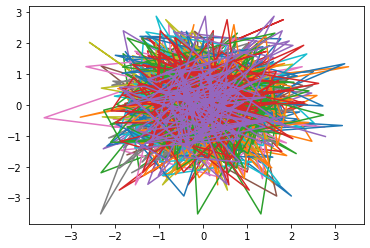

In [58]:
batch_size, input_dimension, output_dimension = 128, 15, 5

hidden1_dimension, hidden2_dimension = 64, 32

lr = 1e-4
epochs = 500

x = torch.randn(batch_size, input_dimension, device=device)
y = torch.randn(batch_size, output_dimension, device=device)

print("x size: ", x.size())
print("y size: ", y.size())

import matplotlib.pyplot as plt

plt.plot(x.numpy(), y.squeeze().numpy())

model = nn.Sequential(
            nn.Linear(input_dimension, hidden1_dimension),
            nn.ReLU(),
            nn.Linear(hidden1_dimension, hidden2_dimension),
            nn.ReLU(),
            nn.Linear(hidden2_dimension, output_dimension),
        ).to(device)

loss_fn = nn.MSELoss(reduction='sum')

In [42]:
model.train()

for i in range(epochs):
    yhat = model(x)
    
    loss = loss_fn(yhat, y)
    if i % 100 == 0:
        print(i, loss.item())

    # Zero the gradients before running the backwprop.
    model.zero_grad()

    # Computer all the gradients of the loss in the respect to all learnable params
    loss.backward()

    # Update the weights using Gradient Decent
    with torch.no_grad():
        for param in model.parameters():
            param.data -= lr * param.grad

0 588.109619140625
100 534.2764892578125
200 493.6708984375
300 441.2568054199219
400 376.0408630371094


In [43]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(epochs):
    yhat = model(x)
    
    loss = loss_fn(yhat, y)

    # Zero the gradients before running the backwprop.
    optimizer.zero_grad()

    # Computer all the gradients of the loss in the respect to all learnable params
    loss.backward()

    # Update the weights using Gradient Decent
    optimizer.step()
    
    if i % 100 == 0:
        print(i, loss.item())



0 306.35101318359375
100 240.90086364746094
200 183.75218200683594
300 137.82928466796875
400 102.49195861816406


So far, we used random-generated datasets. Let's take a look how we can load datasets in PyTorch. Pytorch comes with a lot of predefined datasets which we can play with.  
Let's for example load MNIST data set

In [59]:
train_set = datasets.MNIST('data/', 
                           download=True, 
                           train=True, 
                           transform=transforms.Compose([transforms.ToTensor()]))
test_set = datasets.MNIST('data/', 
                          download=True, 
                          train=False, 
                          transform=transforms.Compose([transforms.ToTensor()]))

100.1%

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz


113.5%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz


100.4%

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz


180.4%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [63]:
print('Train data size: ', train_set.train_data.size())
print('Train data labels: ', train_set.train_labels.size())

print('Test data size: ', test_set.test_data.size())
print('Test data labels: ', test_set.test_labels.size())

Train data size:  torch.Size([60000, 28, 28])
Train data labels:  torch.Size([60000])
Test data size:  torch.Size([10000, 28, 28])
Test data labels:  torch.Size([10000])


Now we can feed our train and test set to the DataLoader which will compact our features in batches

In [66]:
train_loader = torch.utils.data.DataLoader(train_set, shuffle=True, batch_size=4)
test_loader = torch.utils.data.DataLoader(test_set, shuffle=False, batch_size=4)

In [67]:
def train_model(model, data_loader, device, epochs=5):
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    criterion = nn.CrossEntropyLoss()

    model.train()

    for e in range(epochs):
        total_loss = 0
        for batch, (target, labels) in enumerate(train_loader):
            target = target.to(device)
            labels = labels.to(device)

            # Zero the gradients before running the backwprop.
            optimizer.zero_grad()

            yhat = model(target)

            loss = criterion(yhat, labels)

            # Computer all the gradients of the loss in the respect to all learnable params
            loss.backward()

            # Update the weight
            
            optimizer.step()
            total_loss += loss.item()

            if batch % 2000 == 1999:
                print('Epoch {}, Train loss {}'.format(e, total_loss / 2000))
                total_loss = 0
    return model

In [68]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [69]:
model = train_model(NeuralNetwork().to(device), train_loader, device)

Epoch 0, Train loss 0.5011840350180864
Epoch 0, Train loss 0.25185955726355314
Epoch 0, Train loss 0.2112211463302374
Epoch 0, Train loss 0.17720467223227024
Epoch 0, Train loss 0.17143760388344526
Epoch 0, Train loss 0.14812669099867343
Epoch 0, Train loss 0.14941284768283367
Epoch 1, Train loss 0.1012592108398676
Epoch 1, Train loss 0.10372380406409502
Epoch 1, Train loss 0.1128439100086689
Epoch 1, Train loss 0.10377061299607157
Epoch 1, Train loss 0.10927596829645336
Epoch 1, Train loss 0.09933312301337718
Epoch 1, Train loss 0.10272872162237763
Epoch 2, Train loss 0.07166932040918618
Epoch 2, Train loss 0.08248169095627964
Epoch 2, Train loss 0.08210171362012625
Epoch 2, Train loss 0.08656069291476161
Epoch 2, Train loss 0.08853450610814616
Epoch 2, Train loss 0.07419955971930176
Epoch 2, Train loss 0.07656640589656308
Epoch 3, Train loss 0.05739533031638712
Epoch 3, Train loss 0.06034447843767703
Epoch 3, Train loss 0.06327593784057535
Epoch 3, Train loss 0.06754301635641605
Epoc

In [70]:

def test_model(model, dataLoader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for target, labels in dataLoader:
            target, labels = target.to(device), labels.to(device)
            yhat = model(target)
            test_loss += F.nll_loss(yhat, labels, reduction='sum').item()
            prediction = yhat.argmax(dim=1, keepdim=True)
            correct += prediction.eq(labels.view_as(prediction)).sum().item()

    print('Test set: Accuracy: {}/{} ({:.0f}%)\n'.format(
        correct, len(dataLoader.dataset), 100. * correct / len(dataLoader.dataset)))

In [72]:
test_model(model, test_loader)

Test set: Accuracy: 9719/10000 (97%)



Great we have learnt how to create, train, and test our simple Neural Network. We also got very high accuracy 96%, it's not the state of the art though. So, if 96% is not good, what can we do?
There is a better way to solve computer vision tasks than simple shallow NN.

### What is Convolutional Neural Networks?

<center><img src="https://cdn-images-1.medium.com/max/1600/1*uAeANQIOQPqWZnnuH-VEyw.jpeg"/></center>

A CNN is deeplearning algorithm which can take an image as input, assign weights (importance) to different aspect of the image and be able to differentiate one from another

As we understood CNN can include many deferent layers such as Convolutional layer, max pooling layer, and others. Let's try to build one and see if our new model can bit the simple one

In [73]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(4 * 4 * 32, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [74]:
cnn = Cnn().to(device)

cnn = train_model(cnn, train_loader, device)

test_model(cnn, test_loader)

Epoch 0, Train loss 0.3161122822248144
Epoch 0, Train loss 0.11595813107898993
Epoch 0, Train loss 0.09099279879734752
Epoch 0, Train loss 0.07827247228575038
Epoch 0, Train loss 0.07353743316704703
Epoch 0, Train loss 0.06155074527123441
Epoch 0, Train loss 0.06494756502237044
Epoch 1, Train loss 0.04659671987227205
Epoch 1, Train loss 0.05113541786515793
Epoch 1, Train loss 0.04580712734966507
Epoch 1, Train loss 0.049317185407567604
Epoch 1, Train loss 0.046255991576345
Epoch 1, Train loss 0.044558762897753054
Epoch 1, Train loss 0.0392121484102576
Epoch 2, Train loss 0.029443123552084723
Epoch 2, Train loss 0.03360281122329011
Epoch 2, Train loss 0.03389531577543388
Epoch 2, Train loss 0.0336716934354251
Epoch 2, Train loss 0.03458338333294306
Epoch 2, Train loss 0.029805687626922636
Epoch 2, Train loss 0.04182955738970752
Epoch 3, Train loss 0.02288462798366615
Epoch 3, Train loss 0.02782680074398804
Epoch 3, Train loss 0.025994292889069917
Epoch 3, Train loss 0.03525769890119848


### Exercise 2:

1. Load FashionMnist dataset, e.g datasets.FashionMNIST -> train_fashion_set and test_fashion_set
2. Create two data loaders for train and test sets, e.g. train_fashion_loader, test_fashion_loader
3. Create a simple NN with any architecture that you like any numbers of layers and neurons
4. Train the network network on train_fashion_mnist data set
5. Test the network on test_fashion_mnist data set
6. Report the total accuracy

### Exercise 3: Letnet-5
1. Create CNN with next architecture  
    -> Convolution layer ( 1 - input features, 6 - output features, kernel size - (5,5), stride - 1, padding - 2  
    -> Max pooling layer ( 2 - kernel size)  
    -> Convolution layer ( 6 - input features, 16 - output features, kernel size - (5,5), stride - 1, padding - 0  
    -> Max pooling layer ( 2 - kernel size)  
    -> Dence layer (5 * 5 * 16 - input features, 120 - output features)  
    -> Dence layer (120 - input features, 84 - output features)  
    -> Dence layer (84 - input features, 10 - output features)  
    -> Use Relu as activation function  
    
    
2. Use CrossEntropyLoss function
3. Use SGD optimizer with learning rate - 0.001, momentum - 0.9
4. Train network with 10 epochs
5. Test network on test_fashion_set dataset 